In [ ]:
!git clone https://github.com/lokhesh1/BCI-Motor-imagery.git

Cloning into 'BCI-Motor-imagery'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 16.22 MiB | 37.85 MiB/s, done.


In [3]:
!pip install mne scipy numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 67.8 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [8]:
# Install required libraries (run once in Colab)

# Import libraries
import mne
import numpy as np
from scipy.signal import firwin, filtfilt
import matplotlib.pyplot as plt

# Step 1: Load the EEG signal from .edf file
edf_path = "E:/LOKI/BCI-IV/A01T.gdf"  # Update to your file path
raw = mne.io.read_raw_gdf(edf_path, preload=True)

# Step 2: Get the sampling frequency
sfreq = raw.info['sfreq']  # Hz

# Step 3: Define FIR filter parameters
low_cutoff = 1.0   # Hz
high_cutoff = 30.0 # Hz
filter_order = 177 # Must be odd for linear-phase FIR

nyquist = 0.5 * sfreq


fir_coeffs = firwin(
    numtaps=filter_order,
    cutoff=[low_cutoff / nyquist, high_cutoff / nyquist],
    pass_zero=False,
    window='blackman'
)
eeg_data = raw.get_data()
filtered_data = filtfilt(fir_coeffs, 1.0, eeg_data, axis=1)

filtered_raw = mne.io.RawArray(filtered_data, raw.info.copy())

filtered_raw.notch_filter(freqs=50)

Extracting EDF parameters from E:\LOKI\BCI-IV\A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\contextlib.py:142: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Creating RawArray with float64 data, n_channels=25, n_times=672528
    Range : 0 ... 672527 =      0.000 ...  2690.108 secs
Ready.
Filtering raw data in 1 contiguous segment
    Range : 0 ... 672527 =      0.000 ...  2690.108 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
-

<RawArray | 25 x 672528 (2690.1 s), ~128.3 MiB, data loaded>

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 76 original time points ...
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 76 original time points ...
0 bad epochs dropped
0 bad epochs dropped


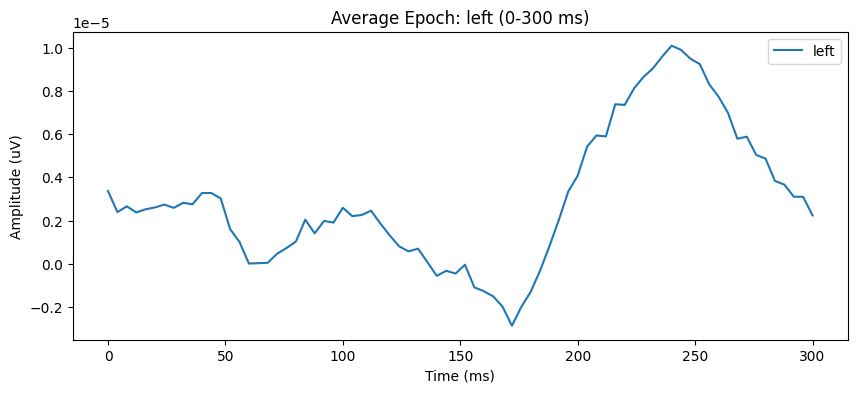

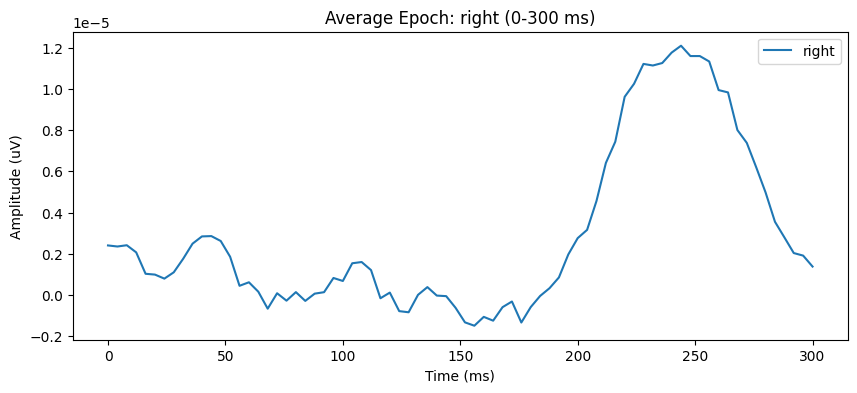

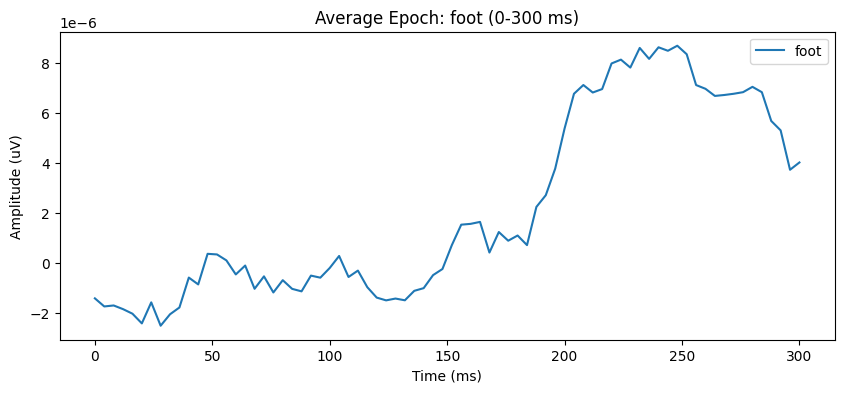

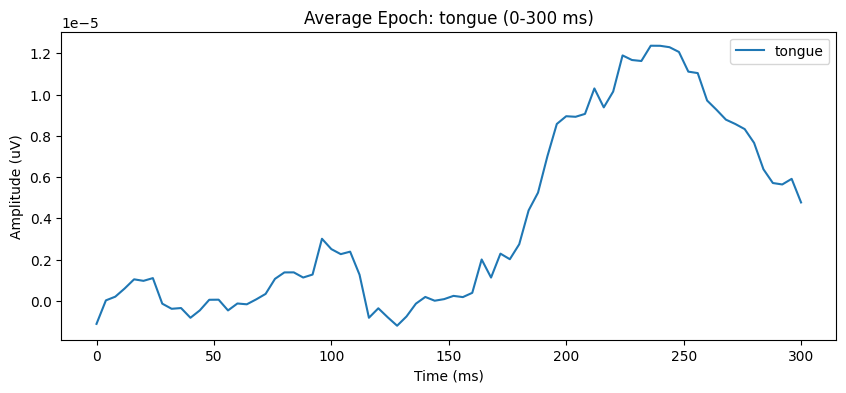

In [9]:
# Visualize 0 ms to 300 ms from only left, right, foot, tongue classes
#import mne
import numpy as np
import matplotlib.pyplot as plt

# Extract events and event_id from annotations
events, event_id = mne.events_from_annotations(raw)

# Define the relevant classes (update these keys if needed to match your dataset)
# Example for BCI Competition IV 2a dataset
# Map numeric GDF codes to human‑readable class names
gdf_to_name = {
    '769': 'left',
    '770': 'right',
    '771': 'foot',
    '772': 'tongue'
}

# Keep only the classes you want
target_classes = ['left', 'right', 'foot', 'tongue']
selected_event_id = {gdf_to_name[k]: event_id[k]
                     for k in gdf_to_name
                     if gdf_to_name[k] in target_classes}

# Epoch extraction
epochs = mne.Epochs(raw, events, event_id=selected_event_id,
                    tmin=0, tmax=0.3, baseline=None, preload=True)


for event_type in selected_event_id:
    plt.figure(figsize=(10, 4))
    ep = epochs[event_type].get_data()
    mean_ep = np.mean(ep, axis=0)
    times = epochs.times * 1000  # convert to ms
    plt.plot(times, mean_ep[0], label=f'{event_type}')
    plt.title(f'Average Epoch: {event_type} (0-300 ms)')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (uV)')
    plt.legend()
    plt.show()

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 76 original time points ...
Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 76 original time points ...
0 bad epochs dropped
0 bad epochs dropped


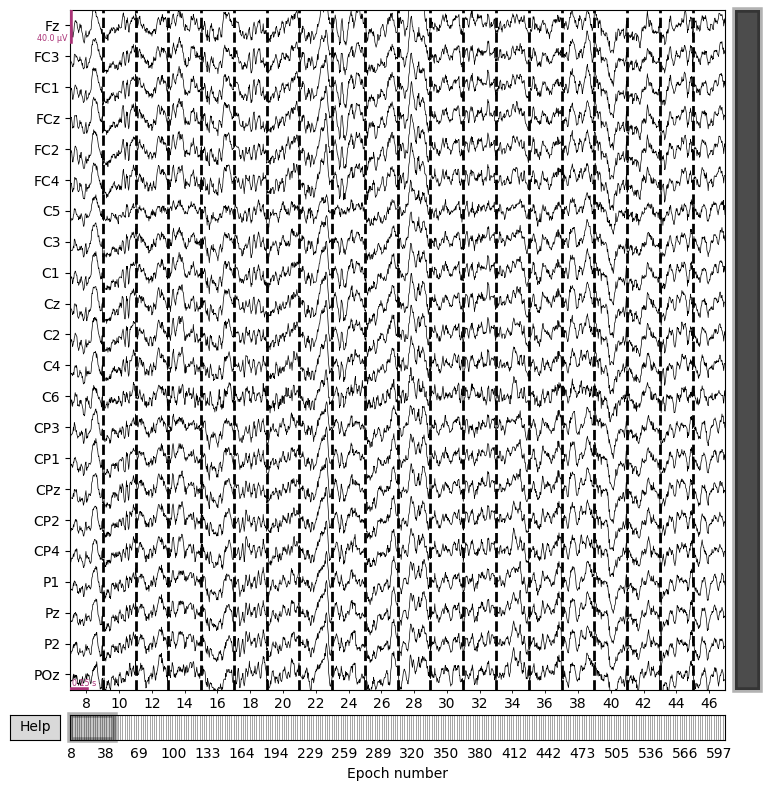

Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
72 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"
combining channels using "mean"


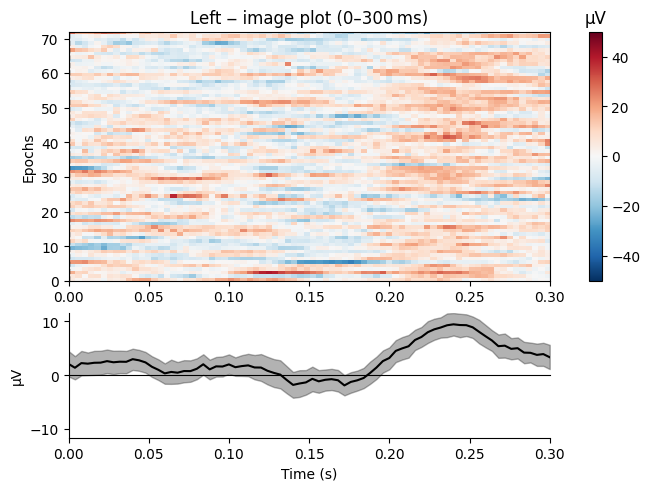

Not setting metadata
72 matching events found
72 matching events found
No baseline correction applied
0 projection items activated
No baseline correction applied
0 projection items activated
combining channels using "mean"
combining channels using "mean"


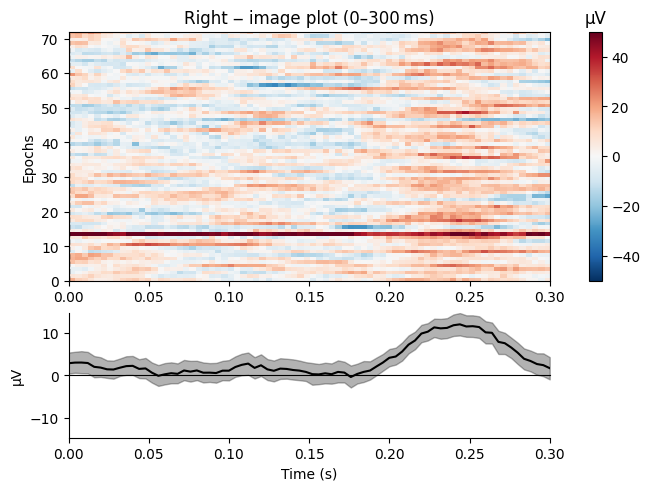

Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
72 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"
combining channels using "mean"


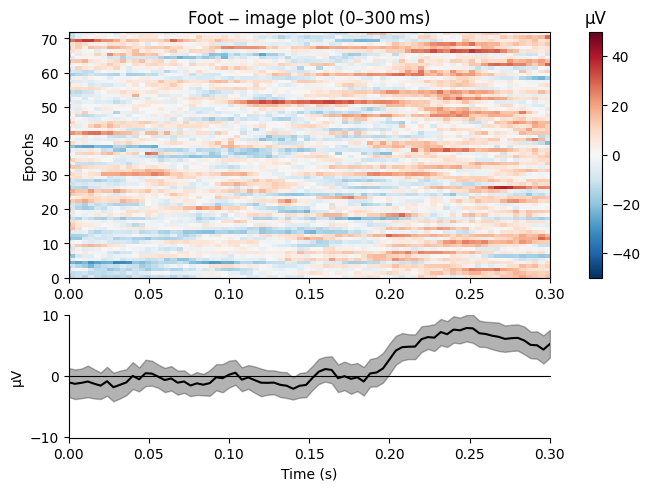

Not setting metadata
72 matching events found
No baseline correction applied
0 projection items activated
72 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"
combining channels using "mean"


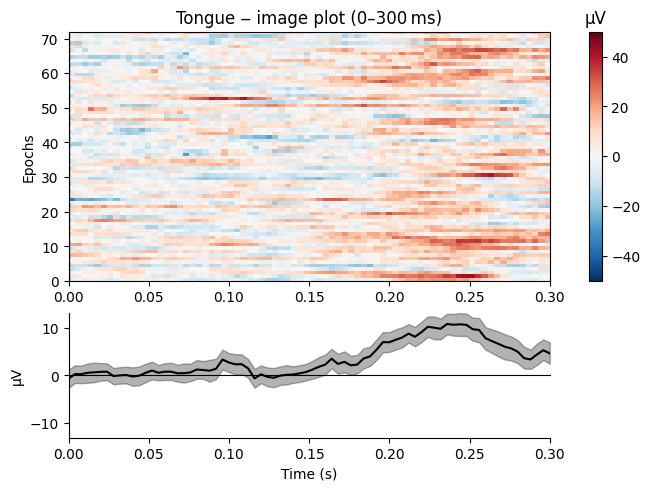

No projector specified for this dataset. Please consider the method self.add_proj.


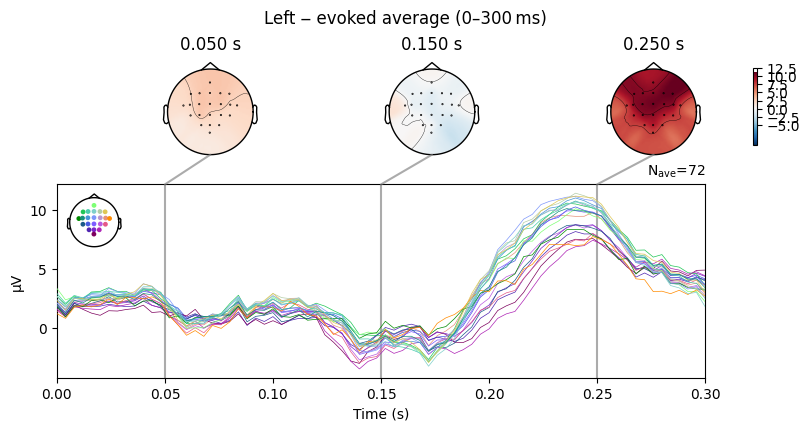

No projector specified for this dataset. Please consider the method self.add_proj.


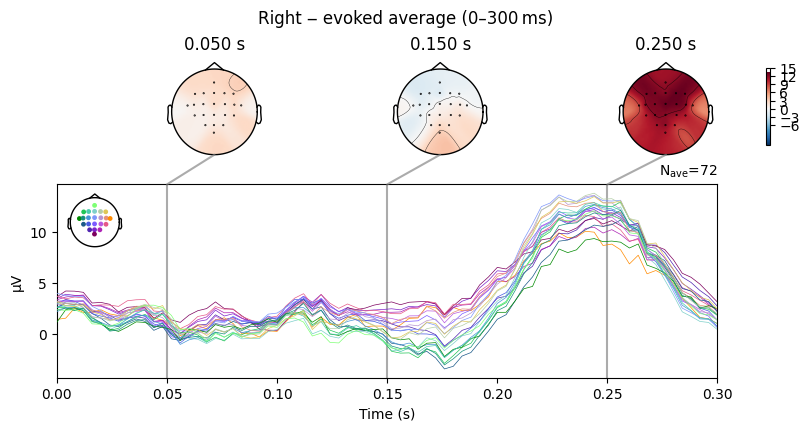

No projector specified for this dataset. Please consider the method self.add_proj.


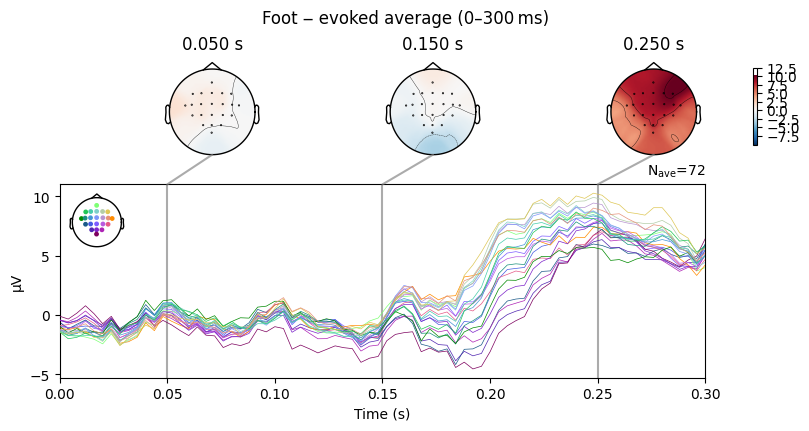

No projector specified for this dataset. Please consider the method self.add_proj.


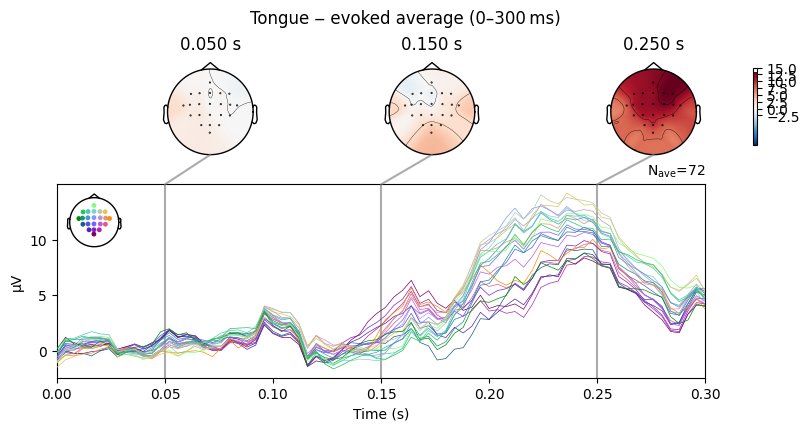

In [13]:
import mne
# Before creating epochs
# These are the standard 22 EEG channel names for the dataset
standard_names = [
    'Fz', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4',
    'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6',
    'CP3', 'CP1', 'CPz', 'CP2', 'CP4',
    'P1', 'Pz', 'P2', 'POz'
]
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])
# Rename only the first 22 EEG channels (exclude EOG etc.)
mapping = {raw.ch_names[i]: standard_names[i] for i in range(22)}
raw.rename_channels(mapping)

raw.set_montage('standard_1020')

# -------------------------------------------------
# 1)  Event mapping and epoch extraction (0–300 ms)
# -------------------------------------------------
events, event_id = mne.events_from_annotations(raw)

gdf_to_name = {'769': 'left', '770': 'right', '771': 'foot', '772': 'tongue'}
selected_event_id = {gdf_to_name[k]: event_id[k] for k in gdf_to_name}

epochs = mne.Epochs(
    raw, events, event_id=selected_event_id,
    tmin=0.0, tmax=0.3,     # 0–300 ms
    baseline=None, preload=True,
    picks="eeg"             # drop EOG / stim channels if present
)

# -------------------------------------------------
# 2)  Quick interactive overview
# -------------------------------------------------
# Shows one scrollable window per class (rows = channels, cols = trials)
epochs.plot(n_epochs=20, n_channels=22, title="All epochs (0–300 ms)")

# -------------------------------------------------
# 3)  Image plot: trial‑by‑time “heat map” for each class
# -------------------------------------------------
for cond in ['left', 'right', 'foot', 'tongue']:
    epochs[cond].plot_image(
        picks="eeg",   # or list of channel names
        vmin=-50, vmax=50,  # μV scale; tweak as needed
        combine='mean',     # average across channels first (optional)
        title=f"{cond.capitalize()} ‒ image plot (0–300 ms)"
    )

# -------------------------------------------------
# 4)  Evoked average with butterfly + GFP + sensor topomaps
# -------------------------------------------------
for cond in ['left', 'right', 'foot', 'tongue']:
    evoked = epochs[cond].average()
    # joint‑plot: time‑series plus topographies at peak latencies
    evoked.plot_joint(
        times=[0.05, 0.15, 0.25],  # 50 ms, 150 ms, 250 ms snapshots
        title=f"{cond.capitalize()} ‒ evoked average (0–300 ms)"
    )

# -------------------------------------------------
# 5)  (Optional) Topomap movie across 0–300 ms
# -------------------------------------------------
# Uncomment to generate a short animation for one condition
# evoked_left = epochs['left'].average()
# evoked_left.animate_topomap(
#     times=np.linspace(0.0, 0.3, 10),   # 10 frames between 0 and 300 ms
#     frame_rate=2, show=True
# )


In [1]:
import numpy as np
print(np.__version__)

1.26.4


In [15]:
!python -m pip install numpy==1.26.4 --user --force-reinstall --no-cache-dir


You should consider upgrading via the 'c:\Users\User\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [17]:
print(epochs.get_data().shape)


(288, 22, 76)


In [18]:
print(raw.info['sfreq'])


250.0
